![BTS](https://github.com/vfp1/bts-dsf-2020/blob/main/Logo-BTS.jpg?raw=1)

# FINAL PROJECT

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Data Science Foundations (2020-10-29)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-dsf-2020/blob/main/Final_project/DSF_FINAL_PROJECT.ipynb)

# Regarding the final project for the class

The final project for the class will need to draw from everything you have covered in class, at least everything relevant for your final project. For that you will need to choose a topic. You will be using **the image and text** datasets that we have seen on our sessions. 

It doesn't need to be a super revolutionary idea, but at least have in mind the issue of reducing the time between information and action. And you will need to send it to me. 

The project will need to contain the following steps:

1. Ingesting, exploring and cleaning data for your project
2. Choosing/testing of algorithm approach
3. Visualizing the results
4. Packaging the project into a product

You will be using code from class to support you on the second, third and forth parts of the project. 

I am not looking for excellence, and I do not mind that you copy/paste code, but always try to understand why. 

In [73]:
%config IPCompleter.greedy=True
%load_ext memory_profiler
%matplotlib inline
%run DSF_FINAL_PROJECT_Helper.ipynb
%run DSF_FINAL_PROJECT_Helper_General.ipynb
%run DSF_FINAL_PROJECT_Plot.ipynb

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [74]:
#twitterAuthentication = TwitterAuthentication(version = "1.0")
#twitterAuthentication.status()
#print(twitterAuthentication)

In [76]:
twitterAuthentication = TwitterAuthentication(version = "1.0")
api = twitterAuthentication.connect()

In [13]:
#Connecting to sqlite3 database
dbConn = Sqlite3Db('social_network.db')

In [ ]:
#Creating tweet Dates table
dbConn.query('''CREATE TABLE IF NOT EXISTS TweetDates(firstdate timestamp, lastdate timestamp)''')

In [ ]:
#Creating tweets table
dbConn.query('''CREATE TABLE IF NOT EXISTS Tweets(insert_timestamp timestamp, tweet_timestamp timestamp, tweet_term TEXT, tweet TEXT, place_type TEXT, place_name TEXT, place_full_name TEXT, place_country_code TEXT, place_country TEXT)''')

In [4]:
twitterProcess = TwitterProcess(api = api, dbConn = dbConn)
limit, remaining, next_reset_time = twitterProcess.get_api_limits()
print(limit, remaining, next_reset_time)

180 180 2021-01-08 21:40:32


In [ ]:
#Exit when we cannot continue
if remaining == 0:
    quit()

In [6]:
dbConn.query('''SELECT count(1) cant FROM TweetDates; ''')
sql_stm_res = dbConn.cursor.fetchall()

In [7]:
sqlite3DbHelper = Sqlite3DbHelper(dbConn = dbConn)
query_stm_res = sqlite3DbHelper.get_count_stm(sql_stm_res)
query_stm_res

1

In [ ]:
firstdate = sqlite3DbHelper.get_timestamp_start_date()
print(firstdate)

In [ ]:
dt.datetime.min

In [8]:
firstdate, lastdate = sqlite3DbHelper.get_process_dates(query_stm_res)
print(firstdate)
print(lastdate)

two
2021-01-05 21:40:43.958648
2021-01-08 21:25:57.312027+00:00


In [9]:
getTimestampStartDate = sqlite3DbHelper.get_timestamp_start_date()
getTimestampStartDate

datetime.datetime(2021, 1, 1, 21, 26, 5, 385452, tzinfo=datetime.timezone.utc)

In [ ]:
days_to_subtract = sqlite3DbHelper.get_days_to_subtract()
days_to_subtract

In [ ]:
start_date = firstdate.date()
end_date = lastdate.date()

delta = dt.timedelta(days=1)

while start_date < end_date:
    dt_twitter_start = start_date
    dt_twitter_end   = start_date + (dt.timedelta(days=1))
    print(dt_twitter_start, "-", dt_twitter_end)
    start_date += delta

In [ ]:
noOfSearch = 1
test = twitterProcess.ins_twitter_tweets_loop(firstdate = firstdate, lastdate = lastdate, noOfSearch = noOfSearch)
test

In [10]:
dbConn.close()

In [ ]:
dfTweetDates

In [ ]:
searchTerms = ["corona", "#corona", "coronavirus", "#coronavirus", "covid", "#covid", "covid19", "#covid19", "covid-19", "#covid-19", "sarscov2", "#sarscov2", "sars cov2", 
"sars cov 2", "covid_19", "#covid_19", "#ncov", "ncov", "#ncov2019", "ncov2019", "2019-ncov", "#2019-ncov", "pandemic", "#pandemic" "#2019ncov", "2019ncov",
"quarantine", "#quarantine", "flatten the curve", "flattening the curve", "#flatteningthecurve", "#flattenthecurve", "hand sanitizer", "#handsanitizer",
"#lockdown", "lockdown", "social distancing", "#socialdistancing", "work from home", "#workfromhome", "working from home", "#workingfromhome", "ppe", "n95",
"#ppe", "#n95", "#covidiots", "covidiots", "herd immunity", "#herdimmunity", "pneumonia", "#pneumonia", "chinese virus", "#chinesevirus", "wuhan virus",
"#wuhanvirus", "kung flu", "#kungflu", "wearamask", "#wearamask", "wear a mask", "vaccine", "vaccines", "#vaccine", "#vaccines", "corona vaccine",
"corona vaccines", "#coronavaccine", "#coronavaccines", "face shield", "#faceshield", "face shields", "#faceshields", "health worker", "#healthworker", 
"health workers", "#healthworkers", "#stayhomestaysafe", "#coronaupdate", "#frontlineheroes", "#coronawarriors", "#homeschool", "#homeschooling",
"#hometasking", "#masks4all", "#wfh", "wash ur hands", "wash your hands", "#washurhands", "#washyourhands", "#stayathome", "#stayhome", "#selfisolating",
"self isolating"]

In [ ]:
for i, searchTerm in enumerate(searchTerms):
     print (i, ",",searchTerm)

In [ ]:
searchTerm = searchTerms[0] + " -filter:retweets"
searchTerm

In [ ]:
#hashtags = ["#COVID19","#coronavirus","#vaccination","#lockdown",]

#searchTerms = "covid+vaccine -filter:retweets"
noOfSearch = 10
searchCountry = "USA"
#searchCountry = "Spain"

places = api.geo_search(query=searchCountry, granularity="country")
place_id = places[0].id
place_id

In [ ]:
start_date = dt.date(2020, 11, 15)
end_date = dt.date(2020, 11, 18)

print(type(start_date))
print(type(end_date))
delta = dt.timedelta(days=1)

while start_date <= end_date:
    print(start_date)
    start_date += delta

In [ ]:
test = sqlite3DbHelper.get_timestamp_now()

In [ ]:
searchTerm = "#vaccination"
noOfSearch = 1

for tweet in tweepy.Cursor(api.search,q=(searchTerm),
                           lang="en",
                           since="2020-12-29",
                           until = "2020-12-30").items(noOfSearch):
#    print (tweet.created_at, tweet.text, tweet.user.location, tweet.place, tweet.coordinates)
#for tweet in tweets:
    print (tweet._json)
    tweet_timestamp = tweet.created_at
    tweet_text = tweet.text.encode('utf-8')
    tweet_term = searchTerm.encode('utf-8')
    """
    print(tweet_timestamp)
    print(type(tweet_timestamp))
    print(tweet_text)
    print(type(tweet_text))
    """
    if tweet.place:
        tweet_place_type = tweet.place.place_type
        tweet_place_name = tweet.place.name
        tweet_place_full_name = tweet.place.full_name
        tweet_place_country_code = tweet.place.country_code
        tweet_place_country = tweet.place.country
        """
        print(tweet_place_type)
        print(type(tweet_place_type))
        
        print(tweet_place_name)
        print(type(tweet_place_name))
        
        print(tweet_place_full_name)
        print(type(tweet_place_full_name))
        
        print(tweet_place_country_code)
        print(type(tweet_place_country_code))
        
        print(tweet_place_country)
        print(type(tweet_place_country))
        """
    else:
        tweet_place_type = "Undefined"
        tweet_place_name = "Undefined"
        tweet_place_full_name = "Undefined"
        tweet_place_country_code = "Undefined"
        tweet_place_country = "Undefined"
    
    insert_timestamp = dt.datetime.now(dt.timezone.utc)
    print(tweet_text)
    ins_stm_str = """INSERT INTO Tweets (insert_timestamp, tweet_timestamp, tweet_term, tweet, place_type, place_name, place_full_name, place_country_code, place_country) VALUES (?,?,?,?,?,?,?,?,?);"""
    data_tuple = (insert_timestamp, tweet_timestamp, tweet_term, tweet_text, tweet_place_type, tweet_place_name, tweet_place_full_name, tweet_place_country_code, tweet_place_country)
    dbConn.query(sqlStm=ins_stm_str, sqlStmPrm=data_tuple)
    #dbConn.commit()


In [ ]:
dbConn.close()

In [ ]:
for tweet in tweepy.Cursor(api.search,q="#vaccination",
                           lang="en",
                           since="2020-12-29",
                           until = "2020-12-30").items(2):
    print (tweet.created_at, tweet.text, tweet.user.location, tweet.place, tweet.coordinates)
    #csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])

In [ ]:
#api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
#screenname = 'lvescobar'
#tweets = api.user_timeline(screenname, count=1)

In [ ]:
#for tweet in tweets:
#    print(tweet.text)

In [ ]:
dateTimeObj = dt.datetime(2020, 11, 15)
dateTimeObj

<h1 style="background-color:powderblue;">Descriptive analysis</h1>

In [ ]:
#!conda install -c conda-forge tweepy -y

In [ ]:
import os
os.system("conda env list")

In [ ]:
#!python -m spacy download en_core_web_lg

In [ ]:
#!python -m spacy download en

In [ ]:
#!python --version

In [11]:
#!which python

/home/scientist/anaconda3/envs/dsfinalproject/bin/python


In [14]:
dbConn.query('''SELECT insert_timestamp, tweet_timestamp, tweet_term, tweet, place_type, place_name, place_full_name, place_country_code, place_country FROM Tweets; ''')

sqlStmRes = dbConn.cursor.fetchall()
#print(type(sqlStmRes))
#print(sqlStmRes)
df_Tweets_original = pd.DataFrame(sqlStmRes, columns =['insert_timestamp','tweet_timestamp','tweet_term', 'tweet', 'place_type', 'place_name', 'place_full_name', 'place_country_code', 'place_country'])

In [15]:
df_Tweets_original.head(5)

,insert_timestamp,tweet_timestamp,tweet_term,tweet,place_type,place_name,place_full_name,place_country_code,place_country
0,2021-01-05 21:40:44.506833,2020-12-29 23:58:10,b'#corona',b'Designed by: @acalypca\n \n#minimal #minimal...,Undefined,Undefined,Undefined,Undefined,Undefined
1,2021-01-05 21:40:44.507268,2020-12-29 23:57:11,b'#corona',"b""RT @JohnBWellsCTM: In the movie 'tangled,' R...",Undefined,Undefined,Undefined,Undefined,Undefined
2,2021-01-05 21:40:44.507451,2020-12-29 23:55:49,b'#corona',b'The swedish pm went to the mall and people a...,Undefined,Undefined,Undefined,Undefined,Undefined
3,2021-01-05 21:40:44.507611,2020-12-29 23:55:18,b'#corona',"b'RT @CovidIndiaSeva: As of today, #COVID19Vac...",Undefined,Undefined,Undefined,Undefined,Undefined
4,2021-01-05 21:40:44.507757,2020-12-29 23:55:04,b'#corona',"b'United States Corona virus\nCases : 19,949,6...",Undefined,Undefined,Undefined,Undefined,Undefined


In [16]:
df_Tweets_original.shape

(3180, 9)

In [17]:
df_Tweets_original.dtypes

insert_timestamp      datetime64[ns]
tweet_timestamp       datetime64[ns]
tweet_term                    object
tweet                         object
place_type                    object
place_name                    object
place_full_name               object
place_country_code            object
place_country                 object
dtype: object

In [18]:
cleaningHelper = CleaningHelper(version = "1.0")
print(cleaningHelper)

Cleaning helper version 1.0


In [19]:
#There should be no null
cleaningHelper.get_nulls_data(df_Tweets_original)

,Total,PercNotNull
insert_timestamp,0,100.0
tweet_timestamp,0,100.0
tweet_term,0,100.0
tweet,0,100.0
place_type,0,100.0
place_name,0,100.0
place_full_name,0,100.0
place_country_code,0,100.0
place_country,0,100.0


In [ ]:
#We are going to check the tweet terms, tweet dates and places at first

In [20]:
df_Tweets_mod = df_Tweets_original.copy()

In [21]:
#df_Tweets_mod['tweet_timestamp_date'] = df_Tweets_mod['tweet_timestamp'].dt.normalize()
df_Tweets_mod['tweet_timestamp_date'] = df_Tweets_mod['tweet_timestamp'].dt.date

In [22]:
df_Tweets_mod['tweet_str'] = df_Tweets_mod['tweet'].str.decode("utf-8")
#df_Tweets_mod[df_Tweets_mod.apply(type) == object] = df_Tweets_mod.str.decode("utf-8")

In [23]:
df_Tweets_mod.dtypes

insert_timestamp        datetime64[ns]
tweet_timestamp         datetime64[ns]
tweet_term                      object
tweet                           object
place_type                      object
place_name                      object
place_full_name                 object
place_country_code              object
place_country                   object
tweet_timestamp_date            object
tweet_str                       object
dtype: object

In [24]:
df_Tweets_mod.head(3)

,insert_timestamp,tweet_timestamp,tweet_term,tweet,place_type,place_name,place_full_name,place_country_code,place_country,tweet_timestamp_date,tweet_str
0,2021-01-05 21:40:44.506833,2020-12-29 23:58:10,b'#corona',b'Designed by: @acalypca\n \n#minimal #minimal...,Undefined,Undefined,Undefined,Undefined,Undefined,2020-12-29,Designed by: @acalypca\n \n#minimal #minimalpo...
1,2021-01-05 21:40:44.507268,2020-12-29 23:57:11,b'#corona',"b""RT @JohnBWellsCTM: In the movie 'tangled,' R...",Undefined,Undefined,Undefined,Undefined,Undefined,2020-12-29,"RT @JohnBWellsCTM: In the movie 'tangled,' Rap..."
2,2021-01-05 21:40:44.507451,2020-12-29 23:55:49,b'#corona',b'The swedish pm went to the mall and people a...,Undefined,Undefined,Undefined,Undefined,Undefined,2020-12-29,The swedish pm went to the mall and people are...


<h3 style="background-color:powderblue;">Raw Data Plotting</h3>

In [25]:
plottingHelper = PlottingHelper(version = "1.0")
print(plottingHelper)

Plotting helper version 1.0


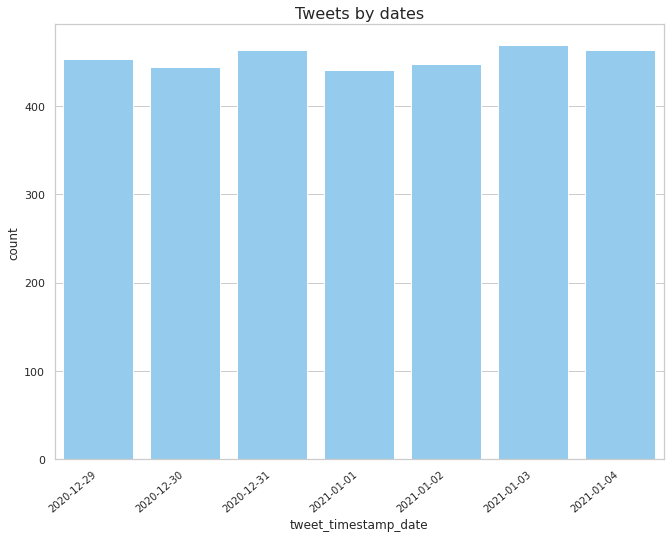

In [26]:
plottingHelper.count_categorical(df = df_Tweets_mod, 
                                 x_var = 'tweet_timestamp_date', 
                                 ax_title = 'Tweets by dates', 
                                 x_size = 16, 
                                 y_size = 8,
                                 bar_color = "lightskyblue",
                                 box_aspect_radio = 5)

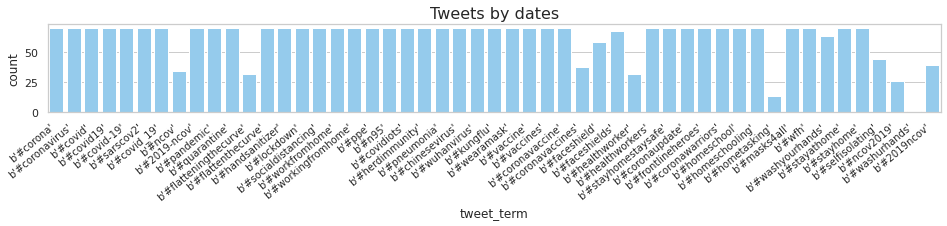

In [27]:
plottingHelper.count_categorical(df = df_Tweets_mod, 
                                 x_var = 'tweet_term', 
                                 ax_title = 'Tweets by dates', 
                                 x_size = 16, 
                                 y_size = 8,
                                 bar_color = "lightskyblue",
                                 box_aspect_radio = 5)

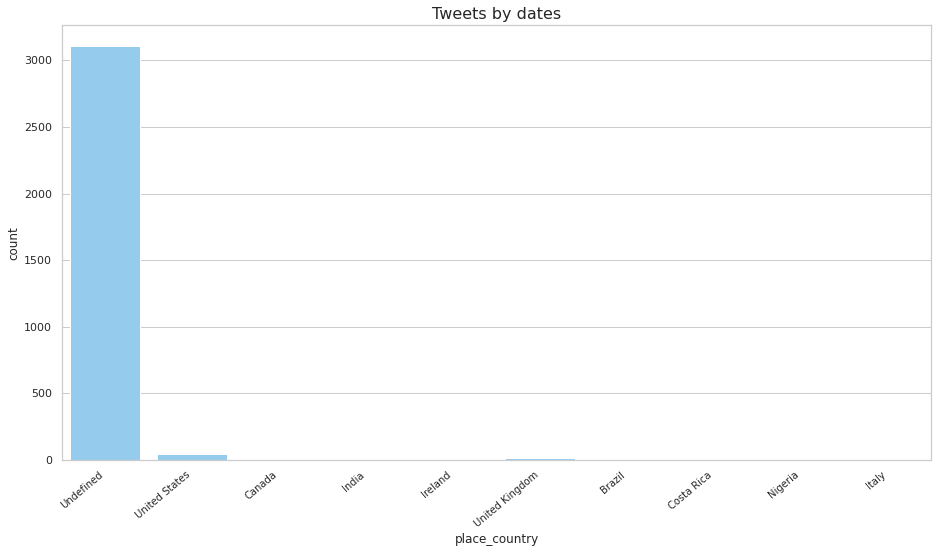

In [28]:
plottingHelper.count_categorical(df = df_Tweets_mod, 
                                 x_var = 'place_country', 
                                 ax_title = 'Tweets by dates', 
                                 x_size = 16, 
                                 y_size = 8,
                                 bar_color = "lightskyblue",
                                 box_aspect_radio = 5)

<h3 style="background-color:powderblue;">Data cleaning</h3>

In [59]:
%config IPCompleter.greedy=True
%load_ext memory_profiler
%matplotlib inline
%run DSF_FINAL_PROJECT_Helper.ipynb
%run DSF_FINAL_PROJECT_Helper_General.ipynb
%run DSF_FINAL_PROJECT_Plot.ipynb

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [ ]:
#Removing Stopwords, punctuations and Lemmatizing

In [31]:
#I decided to use the largest one
spacy_lg = spacy.load('en_core_web_lg')

In [49]:
# sets of punctuation in variable result 
punctuation_str = string.punctuation  
punctuation_str #I want to know if @ is actually include

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [50]:
#Stop words Set
stop_words = spacy.lang.en.stop_words.STOP_WORDS

In [51]:
#English parser object
parser = spacy.lang.en.English()

In [ ]:
#https://spacy.io/api/annotation
tweet_sentence = "@BBCNews @bbcquestiontime why doesn't the BBC report on the numbers of vaccines administered? You give figures on e… https://t.co/hVCqr7pf1z "
doc_tokens = parser(tweet_sentence)
for token in doc_tokens:
    print(f"text:{token.text}, lemma_:{token.lemma_}, lower_:{token.lower_}, pos_:{token.pos_}, tag_:{token.tag_}, dep_:{token.dep_}, shape_:{token.shape_}, Is_alpha:{token.is_alpha}, Is_stop:{token.is_stop}")

In [ ]:
type(doc_tokens)

In [ ]:
# Removing twitter - username 
doc_tokens = [ token_ for token_ in doc_tokens if len(cleaningHelper.get_twitter_username_str(token_ = token_.lemma_.lower().strip())) == 0 ]

# Removing token - URL 
doc_tokens = [ token_ for token_ in doc_tokens if len(cleaningHelper.get_url_str(token_ = token_.lemma_.lower().strip())) == 0 ]

# Lemmatizing each token and converting each token into lowercase
doc_tokens = [ token_.lemma_.lower().strip() if token_.lemma_ != "-PRON-" else token_.lower_ for token_ in doc_tokens ]

# Removing stop words
doc_tokens = [ token_ for token_ in doc_tokens if token_ not in stop_words and token_ not in punctuation_str ]

In [ ]:
doc_tokens

In [60]:
cleaningTweets = CleaningTweets(version = "1.0", spacy_ = spacy_lg, parser_ = parser, punctuation_str_ = punctuation_str, stop_words_ = stop_words)
print(cleaningTweets)

Cleaning Tweets version 1.0


In [ ]:
#https://spacy.io/api/annotation
tweet_sentence = "@BBCNews @bbcquestiontime why doesn't the BBC report on the numbers of vaccines administered? You give figures on e… https://t.co/hVCqr7pf1z "
doc_tokens = cleaningTweets.do_spacy_tokenizer(token_ = tweet_sentence)
doc_tokens

In [37]:
#type(doc_tokens)

In [54]:
#cleaningTweets.get_custom_stop_words()

In [55]:
df_Tweets_mod.head(3)

,insert_timestamp,tweet_timestamp,tweet_term,tweet,place_type,place_name,place_full_name,place_country_code,place_country,tweet_timestamp_date,tweet_str
0,2021-01-05 21:40:44.506833,2020-12-29 23:58:10,b'#corona',b'Designed by: @acalypca\n \n#minimal #minimal...,Undefined,Undefined,Undefined,Undefined,Undefined,2020-12-29,Designed by: @acalypca\n \n#minimal #minimalpo...
1,2021-01-05 21:40:44.507268,2020-12-29 23:57:11,b'#corona',"b""RT @JohnBWellsCTM: In the movie 'tangled,' R...",Undefined,Undefined,Undefined,Undefined,Undefined,2020-12-29,"RT @JohnBWellsCTM: In the movie 'tangled,' Rap..."
2,2021-01-05 21:40:44.507451,2020-12-29 23:55:49,b'#corona',b'The swedish pm went to the mall and people a...,Undefined,Undefined,Undefined,Undefined,Undefined,2020-12-29,The swedish pm went to the mall and people are...


In [ ]:
#https://spacy.io/api/annotation
#tweet_sentence = "@BBCNews @bbcquestiontime why doesn't the BBC report on the numbers of vaccines administered? You give figures on e… https://t.co/hVCqr7pf1z "
#doc_tokens = cleaningTweets.do_spacy_tokenizer(token_ = tweet_sentence)
#doc_tokens

In [61]:
for index, row in df_Tweets_mod.iterrows():
    token_ = str(row["tweet"], encoding='UTF-8')
    #print(token_)
    doc_tokens = cleaningTweets.do_spacy_tokenizer(token_ = token_)
    #print(doc_tokens)

In [57]:
len(doc_tokens)

15

In [63]:
#doc_tokens

In [ ]:
df_doc_tokens = pd.DataFrame(columns = ['token_']) 
ls_tokens = ['kentucky', 'covid', 'cases', 'increase', '261,492', 'deaths', '2,594', 'kentucky', '2019-ncov', 'recombinomics', 'inc.']
for tokens_ in ls_tokens:
    df_doc_tokens = df_doc_tokens.append({'token_' : tokens_}, ignore_index = True) 
    print(tokens_)

In [64]:
#df_doc_tokens

In [65]:
#df_doc_tokens = pd.DataFrame({'token_': pd.Series([], dtype='str')})

In [66]:
df_doc_tokens = cleaningTweets.get_words_df(df_Tweets_ = df_Tweets_mod)

In [67]:
df_doc_tokens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37294 entries, 0 to 37293
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   token_  37294 non-null  object
dtypes: object(1)
memory usage: 291.5+ KB


In [68]:
df_doc_tokens.head(3)

,token_
0,designed
1,minimal
2,minimalposter


In [42]:
df_doc_tokens.groupby(['token_']).token_.value_counts().nlargest(5)

token_   token_ 
…        …          2706
rt       rt         1687
covid19  covid19     370
amp      amp         333
new      new         329
Name: token_, dtype: int64

In [69]:
#Top 10 tokens
df_doc_tokens_grp = df_doc_tokens[['token_']].groupby(['token_'])['token_'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             .head(10)
df_doc_tokens_grp

,token_,count
7906,…,2706
6135,rt,1687
2072,covid19,370
921,amp,333
4925,new,329
1574,cases,273
7824,year,242
2068,covid,200
7415,vaccine,197
2012,coronavirus,190


In [70]:
ls_doc_tokens = cleaningTweets.get_words_list(df_Tweets_ = df_doc_tokens)
#ls_doc_tokens

In [71]:
word_freq = collections.Counter(ls_doc_tokens)
word_freq.most_common(10)

[('…', 2706),
 ('rt', 1687),
 ('covid19', 370),
 ('amp', 333),
 ('new', 329),
 ('cases', 273),
 ('year', 242),
 ('covid', 200),
 ('vaccine', 197),
 ('coronavirus', 190)]

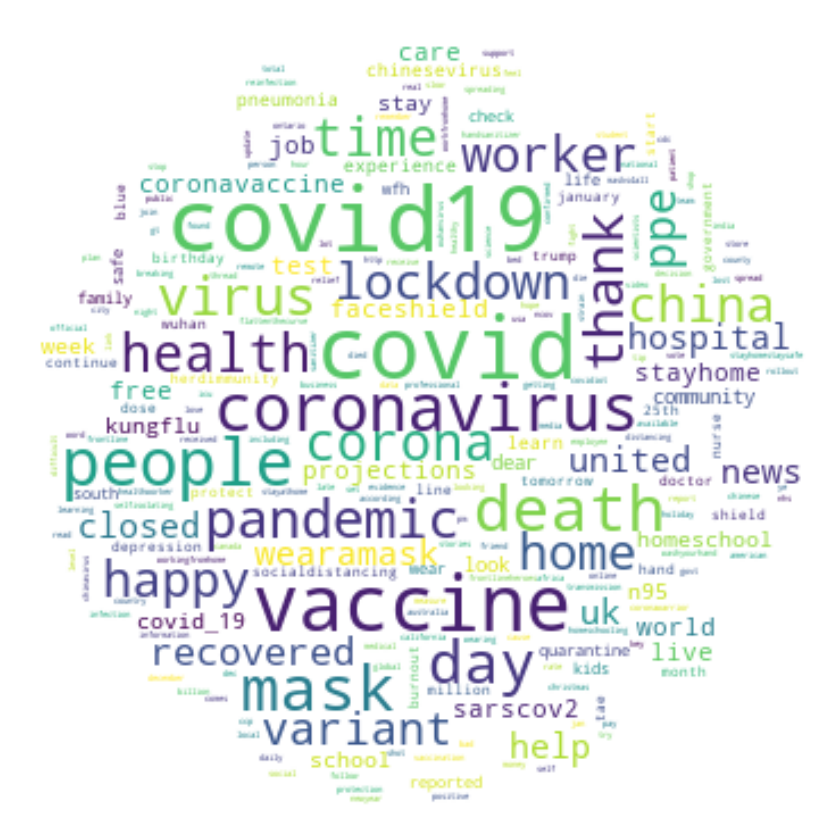

In [72]:
#Instantiate mask
char_mask = np.array(Image.open("covid19.png")) 
#Instantiate the wordcloud object
wc = wordcloud.WordCloud(background_color='white', max_words=300, stopwords=cleaningTweets.get_custom_stop_words(), collocations=False, max_font_size=40, random_state=42, mask=char_mask)
# Generate word cloud
wc=wc.generate(" ".join(ls_doc_tokens).lower())
# Show word cloud
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()